<a href="https://colab.research.google.com/github/lfmartins/introduction-to-computational-mathematics/blob/main/11-TaylorSeries.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Series and For Loops

One of the most dreaded topics in Calculus II is the appearance of series at the end of the course. Generally, we're taught summation notation in the following manner

$$\sum_{n=0}^{\infty} c_n \mbox{ or } \sum_{n=1}^{\infty} c_n$$

where $c_n$ is a sequence of values, $\{c_{n}\}$, that we're summing up, with $n$ representing the index of the sequence, which has starting integer value (above that was either 0 or 1). The above were infinite series, but we can also use a finite number of terms, 

$$\sum_{n=0}^{N} c_n $$

where N is the final index of $n$. 

As much as series can cause headaches when initially introduced to them, one connection between finite series and for-loops. Given the series

$$\sum_{n=1}^{100}1/n^{2}$$

we can calculate this value easily using a for-loop

```
y=0
N=100
for n in range(1,N+1):
      y = y + n**(-2) 
    return y

print(y)
```

If we know how to express the sequence of values being summed up using numpy expressions and the index of our for-loop, then we can translate finite series into for-loops and vice versa.



### Exercises

1. Translate the following series into a for-loop and compute the resulting value:

$$\sum_{n=0}^{50}e^{-n}$$

2. Translate the following series into a for-loop and compute the resulting value:

$$\sum_{n=1}^{200}\frac{1}{2^{n}}+n^2$$

# Series as functions

One jump that we have to make is that we can think of series as function. For instance, $\sum_n 2^n$ and $\sum_n (0.5)^n$ are two points on a for a power series $\sum_n x^{n}$. We can also center the series as a point $a$,  $\sum_n (x-a)^{n}$, as well multiply it be a set of constants $\{c_n\}$,  $\sum_n c_n(x-a)^{n}$.

# Taylor Series

One of the most useful tools in applied math is the ability to take a Taylor series of continuous functions. Given a function $f(x)$ that is continuous on an interval containing $a$, we can have a series representation of the function

$$f(x)=\sum_{n=0}^{\infty}\frac{f^{(n)}(a)}{n!}(x-a)^{n}=f(a)+\frac{f'(a)}{1!}(x-a)+\frac{f''(a)}{2!}(x-a)^2+\frac{f^{(3)}(a)}{3!}(x-a)^3+....$$

Note that this is a power series, $\sum_{n=0}^{\infty}{c_n}{(x-a)^{n}}$, where $c_n$ is the nth coefficient, $a$ is the center of a the series, and $x$ is a variable. Remember that the derivative term we see in a Taylor series is a constant.

$$\sum_{n=0}^{\infty}\color{blue}{c_n}\color{red}{(x-a)^{n}}=\sum_{n=0}^{\infty}\color{blue}{\frac{f^{(n)}(a)}{n!}}\color{red}{(x-a)^{n}}$$

Thinking about Taylor series a little bit, we note that when $x$ is close to $a$, the higher order terms associated with larger $n$ will be smaller. In other words, if $x$ is close to $a$

$$|x-a|>|x-a|^2>|x-a|^3>|x-a|^4>|x-a|^5>...$$

For example, if |x-a|=0.1, then the inequality shows
$$0.1>(0.1)^2>(0.1)^3>(0.1)^4>(0.1)^5>...$$
$$⇒$$
$$0.1>0.01>0.001>0.0001>0.00001>...$$

This means that as $x$ gets close to $a$, the contributions of higher order terms will decrease.


Let's test this out numerically. The function $e^x$ has a Taylor series of $\sum_{n=0}^{\infty}\frac{e}{n!}(x-1)^n$ at $a=1$. For practice, confirm this formula to be true, using the definition of the Taylor series.



The following function computes the Taylor series of $e^x$ at $a=1$ up to first $N$ terms. This is equivalent to $\sum_{n=0}^{N}\frac{e}{n!}(x-1)^n$ 

The function 'exp_TS_1' has two inputs; $x$ is the point at which we're evaluating the Taylor series and $N$ is the highest index we're using in our summation. Remember we also include n=0, so the number of terms in the series is $N+1$.

In [ ]:
import numpy as np
def exp_TS_1(x,N):
    y=np.exp(1)
    for n in range(1,N+1):
      y = y + (np.exp(1)/np.math.factorial(n))*(x-1)**n
    return y

In [ ]:
x=10
N=40

e_true=np.exp(x)
e_TS=exp_TS_1(x,N)

print('The true value of the exponential at x=',x,'is', e_true)
print('The Taylor series value of the exponential using N=',N,'terms at x=',x,'is',e_TS)

The true value of the exponential at x= 10 is 22026.465794806718
The Taylor series value of the exponential using N= 40 terms at x= 10 is 22026.465794806583


### Exercises

1. Use the code given above to test how accurate the Taylor series is at $x=1.1$ using a few different $N$ values. Calculate the absolute error (i.e. the absolute value of the difference between the two values) for each term. How larger an $N$ do we need for a 'reasonable' answer (... say accurate up to 8 digits)?

2. What if we have an $x$ that is further away from the center $a$ of the Taylor series? How many terms do we need to be 'reasonable'? Try for $x=2, 5, 10$.

3. Adjust the code of 'exp_TS_1' to make it so that we can have an input for any $a$ center point of our Taylor series. Let the new function be
```
def exp_TS_a(x,N,a):
```

  Test it for $f(x)=e^{x}$ with $a=10$ at $x=9$

## Absolute Error and Relative Error

If we think of the error associated with the Taylor series approximation, $f_{TS}(x)$, at a point $x_0$, one way would be to calculate the absolute difference between the approximation and the original function, $f(x)$. This is known as absolute error, $e_{abs}$.

$$e_{abs}=|f(x_0)-f_{TS}(x_0)|$$

Another way to calculate the error would be the relative error of the function, where we normalize the error with respect to the function value at $x_0$.

$$e_{abs}=|f(x_0)-f_{TS}(x_0)|/|f(x_0)|$$

This gives the error as a percentage or fraction of the actual value.



### Exercise

1. Let's plot the absolute error for the first 40 terms using of the previous section's Taylor series from #1 and #2. Use a for-loop to store the absolute error.  

2. Repeat for relative error.


# Taylor Polynomials

If one chops of the number of terms of a Taylor series and treats them as a function, then one can think of them as a polynomial approximation to the function $f(x)$, which does not have to be a polynomial.

For instance the 1st order Taylor polynomial of $f(x)=e^{x}$ at $a=1$ is 

$p_1(x)=f(1)+\frac{f'(a)}{1!}(x-a)=e^{1}+e^{1}(x-1)$

and the 2nd order Taylor polynomial is

$p_2(x)=f(1)+\frac{f'(a)}{1!}(x-a)+\frac{f''(a)}{2!}(x-a)^{2}=e^{1}+e^{1}(x-1)+\frac{e^{1}}{2}(x-1)^2$

and the 3rd order Taylor polynomial is

$p_3(x)=f(1)+\frac{f'(a)}{1!}(x-a)+\frac{f''(a)}{2!}(x-a)^{2}+\frac{f'''(a)}{3!}(x-a)^{3}=e^{1}+e^{1}(x-1)+\frac{e^{1}}{2}(x-1)^2+\frac{e^{1}}{6}(x-1)^3$

Plotting them using numpy and matplotlib



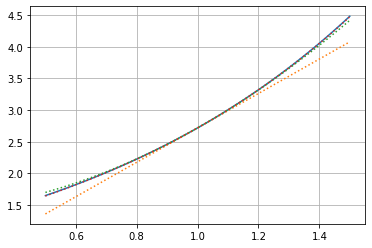

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
def p1(x):
  e=np.exp(1)
  p1=e+e*(x-1)
  return p1
def p2(x):
  e=np.exp(1)
  p1=e+e*(x-1)+(e/2)*(x-1)**2
  return p1
def p3(x):
  e=np.exp(1)
  p1=e+e*(x-1)+(e/2)*(x-1)**2+(e/6)*(x-1)**3
  return p1

x=np.linspace(.5,1.5) 
plt.plot(x,np.exp(x))
plt.plot(x,p1(x),':')
plt.plot(x,p2(x),':')
plt.plot(x,p3(x),':')
plt.grid()

### Exercises

1. Plot the each of first five Taylor polynomials of $f(x)=\sin(x)$ at $a=-3\pi/2$.